# Summarize dominant bacteria by coral host genus

The goal of this notebook is to summarize the dominant bacteria in corals. Ecological dominance is often reported as the relative abundance of the most common taxon. In keeping with this usage, by 'dominant' we simply mean the most abundant type of microbe. The output will be a chart of the proportion of coral genera in which each bacterial taxon was dominant (regardless of its exact abundance). 

Because coral microbiomes differ by tissue type, we summarize dominance separately for each tissue type.



## Load the trait table

The GCMP trait table summarizes disease and microbiome data for each coral genus in the study. 
We will use it as a starting point for the analysis. 

In [42]:
import pandas as pd
merged_table = pd.read_csv("../output/GCMP_trait_table_with_abundances_and_adiv_and_metadata.tsv",sep="\t")
merged_table = merged_table.set_index('host_genus')
merged_table

,host_genus.1,sum_total,sum_dis,sum_healthy,sum_bbd,sum_wd,perc_healthy,perc_dis,perc_bbd,perc_wd,...,surface_temperature,temperature,tissue_loss_percent,turf_contact_percent,Competitive,Generalist,Missing:_Not_collected,Stress_tolerant,Unknown,Weedy
host_genus,,,,,,,,,,,,,,,,,,,,,
Acanthastrea,Acanthastrea,109.0,0.0,99.0,0.0,0.0,90.825688,0.000000,0.000000,0.000000,...,NaN,25.545000,1.166667,2.500000,0,0,0,1,0,0
Acropora,Acropora,31786.0,1158.0,27465.0,179.0,171.0,86.405965,3.643113,0.563141,0.537973,...,NaN,26.401146,NaN,NaN,1,0,0,0,0,0
Aiptasia,Aiptasia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,27.800000,0.000000,0.000000,0,0,1,0,0,0
Alveopora,Alveopora,267.0,2.0,262.0,0.0,1.0,98.127341,0.749064,0.000000,0.374532,...,NaN,20.000000,0.000000,0.000000,0,0,1,0,0,0
Astrea,Astrea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,21.000000,0.000000,0.000000,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Stylophora,Stylophora,895.0,33.0,710.0,4.0,3.0,79.329609,3.687151,0.446927,0.335196,...,NaN,24.790909,NaN,NaN,0,0,0,0,0,1
Tubastraea,Tubastraea,220.0,2.0,215.0,0.0,1.0,97.727273,0.909091,0.000000,0.454545,...,NaN,26.769677,0.000000,0.645161,0,0,1,0,0,0
Tubipora,Tubipora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,26.100000,30.000000,0.000000,0,0,1,0,0,0


## Examine the columns of the trait table

For reference, we will print out the many columns of data in the merged trait table, so we have a sense of what types of data are available to work with.

In [43]:
print(sorted([t for t in list(merged_table.columns)]))

['Colony.maximum.diameter', 'Colony_maximum_GCMP_recorded', 'Colony_maximum_diameter', 'Colony_maximum_diameter_universal', 'Competitive', 'Corallite.width.maximum', 'Corallite.width.minimum', 'Depth.lower', 'Depth.upper', 'Eastern.most.range.edge', 'Generalist', 'Missing:_Not_collected', 'Northern.most.range.edge', 'Oocyte.size.at.maturity', 'Propagule.size.on.release.max', 'Propagule.size.on.release.mean', 'Range.size', 'Skeletal.density', 'Species.age.phylogeny', 'Stress_tolerant', 'Unknown', 'Weedy', 'Western.most.range.edge', 'all_D_0__Archaea___D_1__Thaumarchaeota___D_2__Nitrososphaeria___D_3__Nitrosopumilales', 'all_D_0__Archaea___D_1__Thaumarchaeota___D_2__Nitrososphaeria___D_3__Nitrosopumilales___D_4__Nitrosopumilaceae', 'all_D_0__Archaea___D_1__Thaumarchaeota___D_2__Nitrososphaeria___D_3__Nitrosopumilales___D_4__Nitrosopumilaceae___D_5__Candidatus_Nitrosopumilus', 'all_D_0__Bacteria', 'all_D_0__Bacteria___D_1__Bacteroidetes', 'all_D_0__Bacteria___D_1__Bacteroidetes___D_2__Bac

## Reduce the dataframe

For this analysis, we just need to know the most dominant families in coral mucus, tissue and skeleton, which have already been calculated. So we'll filter the DataFrame to just those columns.

In [44]:
merged_table = merged_table[\
  [ 'host_clade_sensu_fukami',
    'most_abundant_family_mucus',
   'most_abundant_family_tissue',
   'most_abundant_family_skeleton',
   'most_abundant_class_mucus',
    'most_abundant_class_tissue',
    'most_abundant_class_skeleton']]
merged_table

,host_clade_sensu_fukami,most_abundant_family_mucus,most_abundant_family_tissue,most_abundant_family_skeleton,most_abundant_class_mucus,most_abundant_class_tissue,most_abundant_class_skeleton
host_genus,,,,,,,
Acanthastrea,XX,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Archaea;D_1__Thaumarchaeota;D_2__Nitrosos...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...
Acropora,VI,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...
Aiptasia,Outgroup_Cnidaria_Anthozoa_Actiniaria_Aiptasiidae,NaN,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,NaN,NaN,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,NaN
Alveopora,VI,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Planctomycetes;D_2__Plancto...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...
Astrea,XVII,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,Unassigned;__;__;__;__,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,Unassigned;__;__
...,...,...,...,...,...,...,...
Stylophora,X,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroidia
Tubastraea,II,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Archaea;D_1__Thaumarchaeota;D_2__Nitrosos...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Archaea;D_1__Thaumarchaeota;D_2__Nitrosos...
Tubipora,Outgroup_Cnidaria_Anthozoa_Alcyonacea_Tubiporidae,NaN,NaN,NaN,NaN,NaN,NaN


## Filter out outgroup taxa

We only want scleractinian corals, not outgroups like *Xenia*. Note that `~` in pandas means 'not' (similar to `!`).

In [49]:
merged_table = merged_table[~merged_table.host_clade_sensu_fukami.str.contains("Outgroup",na=False)]

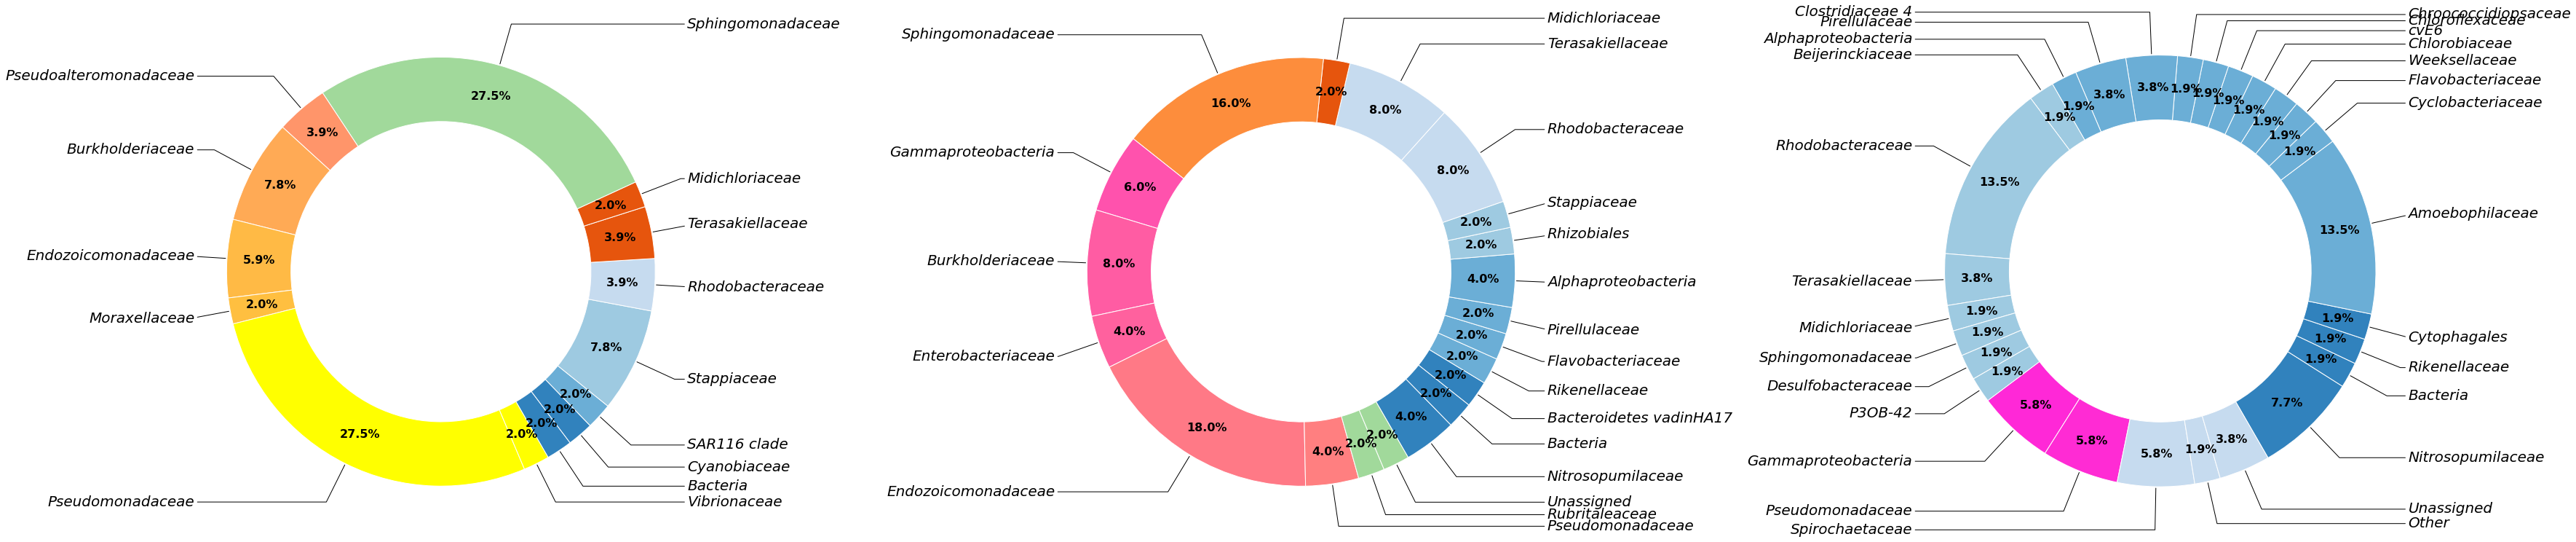

In [53]:
import numpy as np

def get_inner_pie_data_by_col(df,col):
    """Return sizes,labels for a pie chart based on a given df column"""
    #remove NaNw
    pie_data = df.loc[:,col]
    #print("PIE DATA:",pie_data)
    valid_data = pie_data[pie_data.notnull()]
    #print("VALID DATA:",valid_data)
    pie_data = list(valid_data)
    
   
    #print("PIE DATA ONE PER LINE")
    pie_data = [str(p).strip(";__") for p in pie_data]
    pie_data = [p if "uncultured" not in p else "Other" for p in pie_data]
    all_taxa = sorted(list(set(list(pie_data))))
    #print(all_taxa)
    sizes = [pie_data.count(t) for t in all_taxa]
    labels = [l.strip(";__").split("__")[-1]  if l.split("__")[-1] else "Unclassified "+l.strip(";__").split("__")[-1] for l in all_taxa]
    return sizes,labels,all_taxa

fig1, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(60,12))

size = 0.3

cmap = plt.cm.get_cmap("spring")
cmap2 = plt.cm.get_cmap("tab20c")

table_column = "most_abundant_family_mucus"

inner_sizes,inner_labels,all_taxa = get_inner_pie_data_by_col(merged_table,table_column)
#inner_colors = [cmap(i) for i in range(len(inner_labels))]
outer_sizes,outer_labels,outer_taxa = get_inner_pie_data_by_col(merged_table,"most_abundant_class_mucus")

cumulative_inner_sizes = np.cumsum(inner_sizes)
cumulative_inner_sizes = cumulative_inner_sizes/sum(cumulative_inner_sizes)
cumulative_outer_sizes = np.cumsum(outer_sizes)
cumulative_outer_sizes = cumulative_outer_sizes/sum(cumulative_outer_sizes)

ratio = len(inner_labels)/len(outer_labels)
inner_colors = [cmap(cumulative_inner_sizes[i]*ratio*0.9) if "Gammaproteobacteria" in all_taxa[i] else cmap2(cumulative_inner_sizes[i]*ratio*0.9)for i in range(len(inner_labels))]


outer_colors = cmap([cumulative_outer_sizes[i] for i in range(len(outer_labels))])

#print(labels)


#outer_wedges,outer_texts,outer_autotexts = ax1.pie(outer_sizes, labels=outer_labels, autopct='%1.1f%%',
#    pctdistance=0.75,shadow=False, startangle=90,colors=outer_colors,radius = 1.0 - size,\
#    wedgeprops=dict(width=size, edgecolor='w'),labeldistance=2.0)
 
explode = [0.5005 if "Endozoicomonaceae" in all_taxa[i] else 0 for i,label in enumerate(all_taxa)]
#print("explode:", explode)
inner_wedges,inner_texts, inner_autotexts = ax1.pie(inner_sizes, labels=None, autopct='%1.1f%%',
    shadow=False, startangle=300,colors=inner_colors,radius = 1.0 ,\
    wedgeprops=dict(width=size, edgecolor='w'),pctdistance=0.85,labeldistance=5.0,explode=explode)

plt.setp(inner_autotexts, size=16, weight="bold")
#plt.setp(outer_autotexts, size=16, weight="bold")
#plt.setp(outer_texts,size=30,weight="bold")
plt.setp(inner_texts,size=20,weight="bold")

import numpy as np

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec=None, lw=0.72,alpha=0.50)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=None, zorder=0, va="center",fontsize=20,style="italic")

for i, p in enumerate(inner_wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(inner_labels[i], xy=(x, y), xytext=(1.15*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, **kw)


ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


size = 0.3

cmap = plt.cm.get_cmap("spring")
cmap2 = plt.cm.get_cmap("tab20c")

table_column = "most_abundant_family_tissue"

inner_sizes,inner_labels,all_taxa = get_inner_pie_data_by_col(merged_table,table_column)
#inner_colors = [cmap(i) for i in range(len(inner_labels))]
outer_sizes,outer_labels,outer_taxa = get_inner_pie_data_by_col(merged_table,"most_abundant_class_tissue")

cumulative_inner_sizes = np.cumsum(inner_sizes)
cumulative_inner_sizes = cumulative_inner_sizes/sum(cumulative_inner_sizes)
cumulative_outer_sizes = np.cumsum(outer_sizes)
cumulative_outer_sizes = cumulative_outer_sizes/sum(cumulative_outer_sizes)

ratio = len(inner_labels)/len(outer_labels)
inner_colors = [cmap(cumulative_inner_sizes[i]*ratio*0.9) if "Gammaproteobacteria" in all_taxa[i] else cmap2(cumulative_inner_sizes[i]*ratio*0.9)for i in range(len(inner_labels))]


outer_colors = cmap([cumulative_outer_sizes[i] for i in range(len(outer_labels))])

explode = [0.005 if "Endozoicomonas" in all_taxa[i] else 0 for i,label in enumerate(all_taxa)]
inner_wedges,inner_texts, inner_autotexts = ax2.pie(inner_sizes, labels=None, autopct='%1.1f%%',
    shadow=False, startangle=300,colors=inner_colors,radius = 1.0 ,\
    wedgeprops=dict(width=size, edgecolor='w'),pctdistance=0.85,labeldistance=5.0,explode=explode)

plt.setp(inner_autotexts, size=16, weight="bold")
plt.setp(inner_texts,size=20,weight="bold")

import numpy as np

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec=None, lw=0.72,alpha=0.50)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=None, zorder=0, va="center",fontsize=20,style="italic")

for i, p in enumerate(inner_wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax2.annotate(inner_labels[i], xy=(x, y), xytext=(1.15*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, **kw)


ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

size = 0.3

cmap = plt.cm.get_cmap("spring")
cmap2 = plt.cm.get_cmap("tab20c")

table_column = "most_abundant_family_skeleton"

inner_sizes,inner_labels,all_taxa = get_inner_pie_data_by_col(merged_table,table_column)
outer_sizes,outer_labels,outer_taxa = get_inner_pie_data_by_col(merged_table,"most_abundant_class_skeleton")

cumulative_inner_sizes = np.cumsum(inner_sizes)
cumulative_inner_sizes = cumulative_inner_sizes/sum(cumulative_inner_sizes)
cumulative_outer_sizes = np.cumsum(outer_sizes)
cumulative_outer_sizes = cumulative_outer_sizes/sum(cumulative_outer_sizes)

ratio = len(inner_labels)/len(outer_labels)
inner_colors = [cmap(cumulative_inner_sizes[i]*ratio*0.9) if "Gammaproteobacteria" in all_taxa[i] else cmap2(cumulative_inner_sizes[i]*ratio*0.9)for i in range(len(inner_labels))]


outer_colors = cmap([cumulative_outer_sizes[i] for i in range(len(outer_labels))])


 
explode = [0.005 if "Endozoicomonas" in all_taxa[i] else 0 for i,label in enumerate(all_taxa)]
inner_wedges,inner_texts, inner_autotexts = ax3.pie(inner_sizes, labels=None, autopct='%1.1f%%',
    shadow=False, startangle=300,colors=inner_colors,radius = 1.0 ,\
    wedgeprops=dict(width=size, edgecolor='w'),pctdistance=0.85,labeldistance=5.0,explode=explode)

plt.setp(inner_autotexts, size=16, weight="bold")
plt.setp(inner_texts,size=20,weight="bold")



bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec=None, lw=0.72,alpha=0.50)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=None, zorder=0, va="center",fontsize=20,style="italic")

for i, p in enumerate(inner_wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax3.annotate(inner_labels[i], xy=(x, y), xytext=(1.15*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, **kw)


ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.savefig(f"pie_chart_{table_column}.png",dpi=300)
plt.savefig(f"pie_chart_{table_column}.svg",dpi=300)